In [2]:
# Load the ISLR package and get structure of the dataset
library(ISLR)
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [5]:
# summary of the dataset and any NA values
print(summary(Caravan$Purchase))
print(any(is.na(Caravan)))

  No  Yes 
5474  348 
[1] FALSE


In [6]:
# Standardize the variables except Purchase
purchase <- Caravan[, 86]
standardized.Caravan <- scale(Caravan[, -86])
print(var(standardized.Caravan[, 1]))
print(var(standardized.Caravan[, 2]))

[1] 1
[1] 1


In [7]:
# Train test split
test.index <- 1:1000
test.data <- standardized.Caravan[test.index, ]
test.purchase <- purchase[test.index]
train.purchase <- purchase[-test.index]
train.data <- standardized.Caravan[-test.index, ]
print(dim(train.data))
print(dim(test.data))

[1] 4822   85
[1] 1000   85


In [12]:
# KNN model
library(class)
set.seed(101)
predicted.purchase <- knn(train.data, test.data, train.purchase, k = 5)
print(head(predicted.purchase))

[1] No No No No No No
Levels: No Yes


In [13]:
# Misclassification error
misclass.errors <- mean(test.purchase != predicted.purchase)
print(misclass.errors)

[1] 0.066


In [15]:
# Choosing a K value

predicted.purchase <- NULL
error.rate <- NULL

for (i in 1:20) {
    set.seed(101)
    predicted.purchase <- knn(train.data, test.data, train.purchase, k = i)
    error.rate[i] <- mean(test.purchase != predicted.purchase)
}
print(error.rate)
print(min(error.rate))

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059
[1] 0.058


Warning message:
"package 'ggplot2' was built under R version 4.4.1"


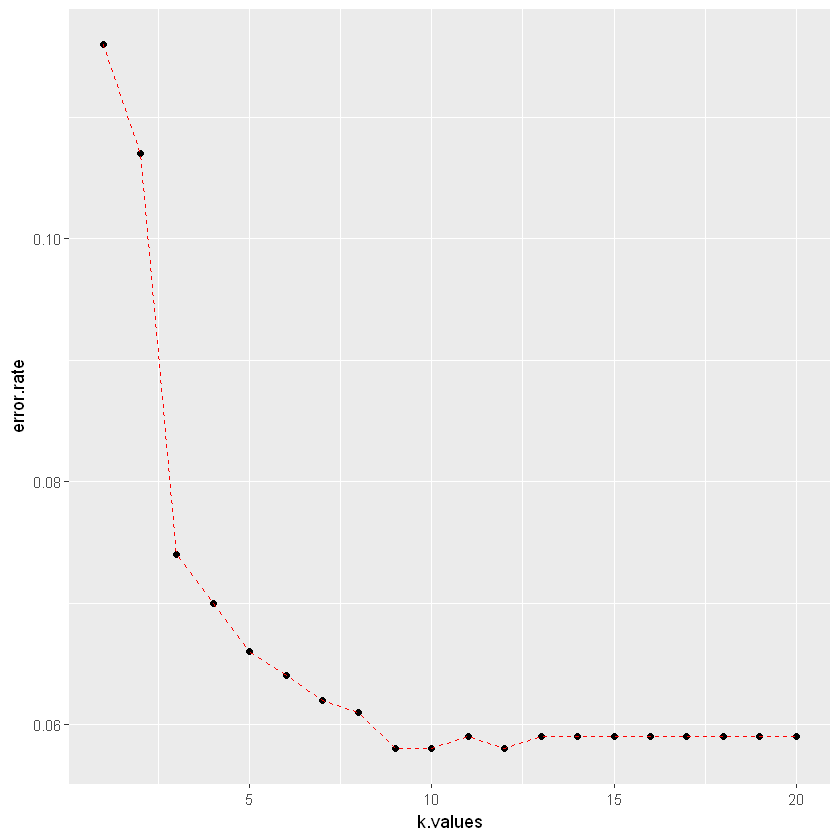

In [16]:
# Visualize K Elbow Method
library(ggplot2)
k.values <- 1:20
error.df <- data.frame(error.rate, k.values)
ggplot(error.df, aes(x = k.values, y = error.rate)) + geom_point() + geom_line(lty = "dashed", color = "red")

In [ ]:
# Elbow point is 9, then flattens out